## Pyplot tutorial

#### by 경기대학교 경영정보학과 박상언

https://matplotlib.org/users/pyplot_tutorial.html

matplotlib.pyplot

아래 내용은 주피터에서 그래프를 화면에 표시하거나, 한글을 사용하여 그래프를 그리거나, 그래프에 음수를 쓰는 경우를 대비해 항상 실행시키는 것이 좋다.

In [1]:
#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

import matplotlib.pyplot as plt

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

#### 1. 1차원 리스트 그래프
1차원 리스트로 이루어진 변수의 값들을 연결해서 그래프를 그린다.
<br> x축은 리스트의 인덱스가 자동으로 할당된다.
<br> ylabel 혹은 xlabel로 y축이나 x축의 라벨을 지정할 수 있다.

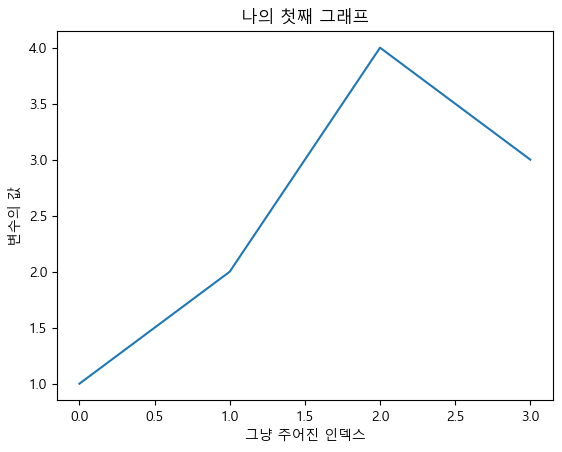

In [10]:
plt.plot([1,2,4,3])
plt.title('나의 첫째 그래프') # 그래프 제목
plt.xlabel('그냥 주어진 인덱스')  #x축의 label을 지정
plt.ylabel('변수의 값') #y축의 label을 지정
plt.show()

#### 2. 두개의 변수를 좌표로 사용하는 2차원 그래프
plt.plot의 매개변수로 길이가 같은 두 개의 리스트를 준다.
<br> 좌표값 외에 'ro', 'b-' 등을 사용하여 점의 모양을 지정할 수 있다.
<br> plt.axis로 축의 범위를 지정할 수 있다.

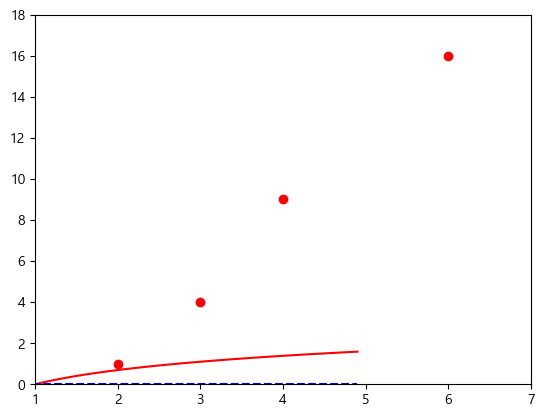

In [19]:
plt.plot([2,3,4,6], [1,4,9,16], 'ro') #'ro'는 붉은(r:red) 원(o:circle)으로 주어진 위치를 표시
# 'ro'를 사용하면 점은 연결되지 않는다
#'b-'는 blue, solid line을 의미한다.

plt.axis([1, 7, 0, 18]) #축의 범위를 지정 [xmin, xmax, ymin, ymax]

# 혹은 아래와 같이 x축과 y축의 범위를 별도로 지정할 수 있다.
#plt.xlim(1, 9)
#plt.ylim(0, 20)

plt.show()

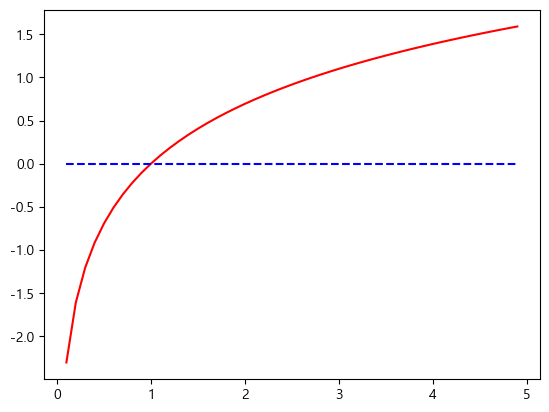

In [16]:
import numpy as np
from math import log

x = np.arange(0.1, 5., 0.1) # range()와는 달리 실제로 값이 생성되어 ndarray로 저장
plt.plot(x, np.log(x), 'r')
plt.plot(x, x*0, 'b--')
#plt.plot(x, np.exp(x), 'b')
#plt.legend(['log', 'exp'])
plt.show()


#### 3. 막대그래프 (bar chart) 그리기

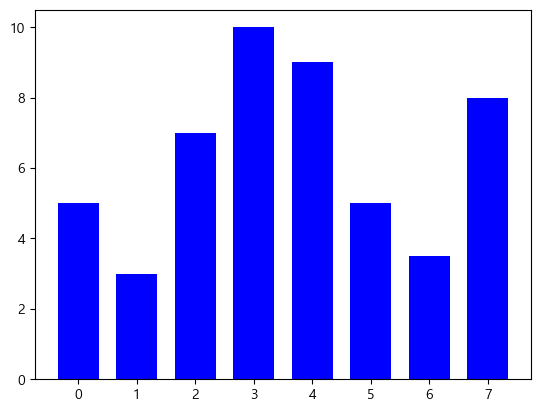

In [22]:
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
plt.bar(x, y, width=0.7, color="blue")
plt.show()

#### 4. 파이 차트(Pie Chart) 그리기

https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

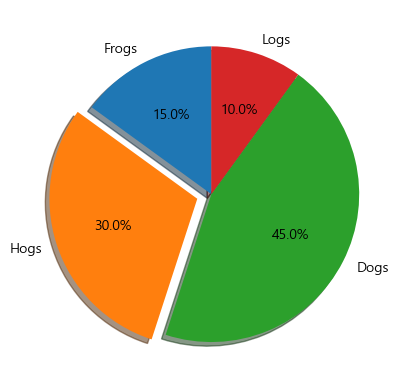

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs' #각 파이의 label
sizes = [15, 30, 45, 10] #각 파이의 크기
explode = (0, 0.1, 0, 0)  # 각 파이에 대해 중앙으로부터의 거리 지정, 여기서는 두번째 파이를 강조하기 위해 떼어냄

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#autopct: 파이의 값을 보여주기 위한 포맷팅, 소숫점이하 한 자리
#shadow: 그림자 여부
#startangle: 시작 위치를 지정, 90이면 y축 양의 방향에서 출발

# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 5. 히스토그램 그리기

https://matplotlib.org/gallery/statistics/hist.html

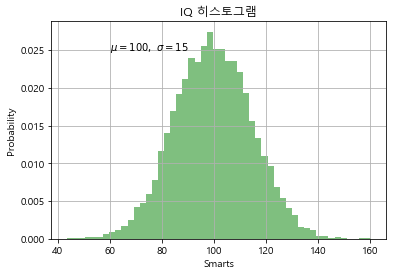

In [7]:
# random 함수를 사용할 때, reproducibility(재생산성)을 위해 seed를 지정
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) #정규분포에 가깝게 값을 생성

# bins는 나누어서 보여 줄 칸의 수
# density가 True이면 y축을 확률로 변경, False이면 Count
plt.hist(x, bins=50, density=True, facecolor='g', alpha=0.5) # facecolor:내부색깔, alpha:투명도 조정
#plt.hist(x, bins=50)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('IQ 히스토그램')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # (60, 0.025) 좌표에 텍스트를 출력, $로 감싸서 TeX 수식 사용 가능
#plt.axis([40, 160, 0, 0.03]) #y축을 확률로 가정하고 적절한 범위를 지정, 만일 count로 하게 되면 조정이 필요
plt.grid(True)
plt.show()

In [8]:
len(x)

10000

#### 6. 여러 그래프를 겹쳐서 그리기
매개변수로 x, y pair를 연속하여 할당하면 여러 그래프를 동시에 그릴 수 있다. <br>
너무나 당연하게도 리스트가 아닌 numpy array로 그래프를 그릴 수 있다. <br>
사실 리스트를 비롯한 모든 sequence는 내부에서 numpy array로 변환된다.

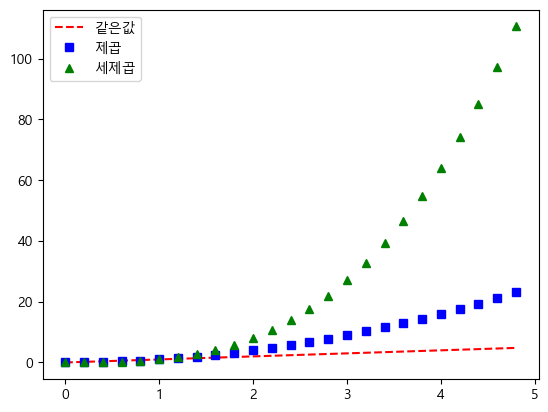

In [40]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

# 아래와 같이 나눠서 하는 것도 가능
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')

plt.legend(['같은값', '제곱', '세제곱']) # 범례를 추가하고 싶을 때, 그린 plot의 수만큼 지정 가능

plt.show()

#### 7. 선 속성 설정하기
setp() 함수를 이용하여 선 굵기, 모양 등 다양한 속성을 설정할 수 있다.<br>
line의 속성과 값은 아래와 같다.
![](lineproperty.png "line property")

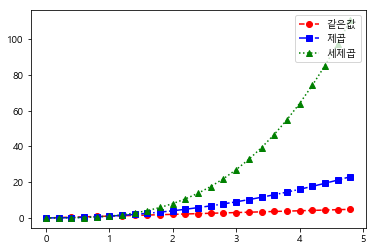

In [10]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

line1 = plt.plot(t, t, label='같은값') #plot을 그릴 때, label을 지정할 수 있음
line2 = plt.plot(t, t**2, label='제곱')
line3 = plt.plot(t, t**3, label='세제곱')

plt.setp(line1, color='red', linestyle='--', marker='o')
plt.setp(line2, color='blue', linestyle='-.', marker='s')
plt.setp(line3, color='green', linestyle=':', marker='^')

plt.legend(loc='upper right') #지정된 label을 이용해서 범례(legend)를 그림, loc은 legend의 위치를 지정

plt.show()

In [11]:
#line에 할당할 수 있는 property 값 확인
plt.setp(line1)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  antialiased: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth: float
  marker: unknown
  markeredgecolor: color
  markeredgewidth: float
  markerfacecolor: color
  markerfacecoloralt: color
  markersize: float
  markevery: unknown
  path_effects: `.AbstractPathEffect`
  picker: float or callable[[Arti

#### 8. 여러 그래프를 동시에 그리기

https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

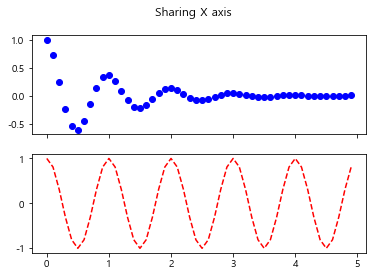

In [12]:
def f_graph(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

x = np.arange(0.0, 5.0, 0.1)
f, axarr = plt.subplots(2, sharex=True) # ncols는 생략, nrows는 2, 즉 두 개의 row로 된 subplot을 생성
# shareX, shareY는 각각 x축 혹은 y축을 공유할 지 여부

# f는 전체 그림판, axarr은 나누어진 두 개의 subplot을 array로 반환
f.suptitle('Sharing X axis')

axarr[0].plot(x, f_graph(x), 'bo') #첫째 subplot에 그림을 그림
axarr[1].plot(x, np.cos(2*np.pi*x), 'r--') #둘째 subplot에 그림을 그림
plt.show()

2X2의 타일로 그래프 네 개를 그리고 싶다면?

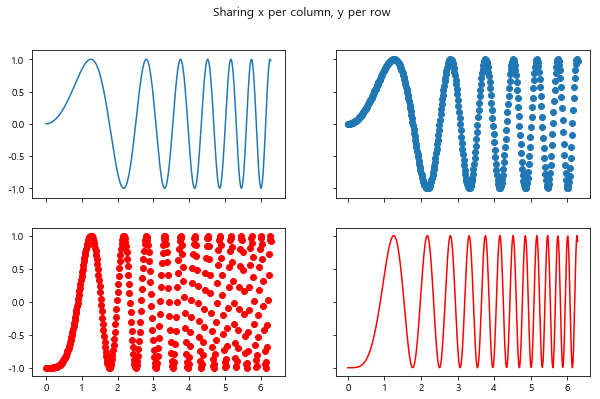

In [13]:
x = np.linspace(0, 2 * np.pi, 400) #주어진 범위(0~2*np.pi) 사이에 400개의 등간격 숫자를 생성
y = np.sin(x ** 2)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 6)) #2x2의 subplot 생성, figsize로 각 subplot의 크기를 지정
f.suptitle('Sharing x per column, y per row')

axarr[0, 0].plot(x, y)
axarr[0, 1].scatter(x, y)
axarr[1, 0].scatter(x, 2 * y ** 2 - 1, color='r')
axarr[1, 1].plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

subplot을 그리는 다른 방법

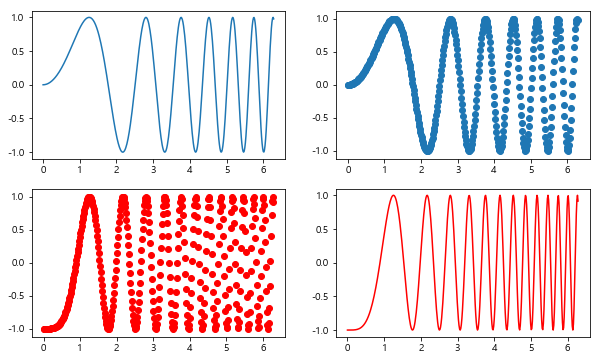

In [14]:
f = plt.figure(figsize=(10, 6)) #전체 그림판 설정 및 그래프 크기 설정

plt.subplot(2,2,1) #rows = 2, columns = 2로 나눈 것 중에서 첫째 subplot을 지정
plt.plot(x, y)

plt.subplot(2,2,2)
plt.scatter(x, y)

plt.subplot(2,2,3)
plt.scatter(x, 2 * y ** 2 - 1, color='r')

plt.subplot(2,2,4)
plt.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

그림을 pdf로 저장하기

In [15]:
f.savefig("foo.pdf", bbox_inches='tight')